In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import time

from math import *

In [2]:
W=2*np.pi
dw=0.1
T=(2*np.pi)/W
n=15
L=n*T

N_grid=6000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
d=0.25
dd=-0.2

In [3]:
st=0
while (t[st]-T/2<0):
    st=st+1
fn=N_grid-1    
while (t[fn]+T/2>L):
    fn=fn-1
print(st, fn)

200 5799


In [4]:
jump_k=[]
jump_kC=[]
jump_kR=[]
jump_kR0=[]

for s in range(N_grid-2*p):
    start = time.time()
    k0=np.array([d]*N_grid)
    k0[2*p:2*p+s]=d+dd
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan
        
    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    
    jump_k.append((k_hat[2*p+s]-d)/dd)
    jump_kC.append((max(np.array(k_hat[2*p+s:]))-d)/dd)
    jump_kR.append(np.sqrt(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/L)
#    jump_kR0.append(np.sqrt(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/(L*np.std(k0)))
    stop = time.time()
    print(s, stop-start)


0 2.7081727981567383
1 2.7374179363250732
2 2.7543320655822754
3 2.7907071113586426
4 2.830913782119751
5 2.751469850540161
6 2.714369058609009
7 2.7219252586364746
8 2.7138986587524414
9 2.7185401916503906
10 2.7538137435913086
11 2.804164171218872
12 2.927635669708252
13 2.701782464981079
14 2.686849355697632
15 2.7055320739746094
16 2.9342145919799805
17 2.782086133956909
18 2.816699743270874
19 2.7366440296173096
20 2.9944140911102295
21 2.835996627807617
22 2.8084661960601807
23 2.868116855621338
24 2.758310556411743
25 2.747136354446411
26 3.53214955329895
27 2.7149577140808105
28 2.6907403469085693
29 2.718830108642578
30 2.686337947845459
31 2.737776756286621
32 2.7145283222198486
33 2.7342517375946045
34 1308.7812659740448
35 2.9450833797454834
36 2.9024665355682373
37 3.092107057571411
38 3.1287078857421875
39 2.8558077812194824
40 2.889059066772461
41 2.943453073501587
42 2.8828296661376953
43 2.950793981552124
44 2.8825244903564453
45 2.8610551357269287
46 2.871337175369262

369 2.887551784515381
370 3.0099074840545654
371 3.262775182723999
372 3.260645866394043
373 3.352729320526123
374 3.148944616317749
375 3.1467337608337402
376 2.983060836791992
377 2.939324140548706
378 3.063370704650879
379 3.2804648876190186
380 3.043177843093872
381 3.118288993835449
382 3.2871389389038086
383 2.9288482666015625
384 2.9561002254486084
385 2.955699920654297
386 2.866811513900757
387 3.0241942405700684
388 2.9687740802764893
389 3.0634145736694336
390 3.0331544876098633
391 3.028231620788574
392 3.1513311862945557
393 3.2110865116119385
394 3.005526542663574
395 2.9775729179382324
396 3.028798818588257
397 2.9674956798553467
398 2.983509063720703
399 2.947680950164795
400 3.030294179916382
401 3.034545660018921
402 3.0723519325256348
403 3.0345678329467773
404 3.079119920730591
405 2.999089002609253
406 3.0544769763946533
407 3.0912044048309326
408 3.0597317218780518
409 3.1464362144470215
410 3.05204439163208
411 3.0433430671691895
412 3.06640362739563
413 3.0308859

734 2.6835649013519287
735 2.677313804626465
736 2.661283016204834
737 2.6890792846679688
738 2.660815954208374
739 2.6757583618164062
740 2.6582772731781006
741 2.7080113887786865
742 2.6679255962371826
743 2.656013250350952
744 2.6474220752716064
745 2.648074150085449
746 2.679227113723755
747 2.7601051330566406
748 2.6741106510162354
749 2.64563250541687
750 2.651540994644165
751 2.6894936561584473
752 3.188507318496704
753 3.516991376876831
754 3.5014853477478027
755 3.4696621894836426
756 3.0587286949157715
757 2.664557695388794
758 2.71810245513916
759 2.6629068851470947
760 2.6833720207214355
761 2.649501085281372
762 2.8566508293151855
763 3.181478500366211
764 2.844851016998291
765 2.931995391845703
766 2.8182060718536377
767 3.2839205265045166
768 2.9911177158355713
769 2.953061819076538
770 3.188084125518799
771 3.0198752880096436
772 2.6593070030212402
773 2.6906023025512695
774 2.6816763877868652
775 2.689239740371704
776 2.6709842681884766
777 2.653728723526001
778 2.6529

1094 2.700676918029785
1095 2.7297706604003906
1096 2.6550161838531494
1097 2.7341928482055664
1098 2.693067789077759
1099 2.747682809829712
1100 2.813816785812378
1101 3.0913400650024414
1102 2.7446577548980713
1103 2.8271074295043945
1104 2.8185391426086426
1105 3.042940616607666
1106 3.094454050064087
1107 3.02717924118042
1108 2.8539164066314697
1109 2.8542063236236572
1110 2.7269530296325684
1111 2.710144519805908
1112 2.8412387371063232
1113 2.8790953159332275
1114 2.9313600063323975
1115 2.9767613410949707
1116 2.8116886615753174
1117 2.814081907272339
1118 2.850309371948242
1119 2.8976383209228516
1120 2.7982327938079834
1121 2.8732502460479736
1122 2.7469968795776367
1123 2.769803285598755
1124 2.7244112491607666
1125 2.8165946006774902
1126 2.6876113414764404
1127 2.719313144683838
1128 2.7949283123016357
1129 2.6928622722625732
1130 2.742589235305786
1131 2.7901220321655273
1132 2.7385036945343018
1133 2.6633594036102295
1134 2.688596248626709
1135 2.7031643390655518
1136 2.

1443 2.750751495361328
1444 2.720949649810791
1445 2.742003917694092
1446 2.6910574436187744
1447 2.712798595428467
1448 2.682615280151367
1449 2.7421748638153076
1450 2.704261541366577
1451 2.7086071968078613
1452 2.7038018703460693
1453 2.673337697982788
1454 2.7412071228027344
1455 2.7367873191833496
1456 2.685832977294922
1457 2.708631753921509
1458 2.643638849258423
1459 2.721766233444214
1460 2.693966865539551
1461 2.7101593017578125
1462 2.6576085090637207
1463 2.659308671951294
1464 2.699411630630493
1465 2.7012033462524414
1466 2.6635937690734863
1467 2.6741201877593994
1468 2.715001344680786
1469 2.688608407974243
1470 2.695722818374634
1471 2.6572062969207764
1472 2.669523239135742
1473 2.6863250732421875
1474 2.6867032051086426
1475 2.6759824752807617
1476 2.7150535583496094
1477 2.6876583099365234
1478 2.6887588500976562
1479 2.699767589569092
1480 2.667238235473633
1481 2.6973037719726562
1482 2.6734094619750977
1483 2.7546260356903076
1484 2.647508144378662
1485 2.690439

1793 2.6957077980041504
1794 2.6773951053619385
1795 2.672642946243286
1796 2.6946609020233154
1797 2.6760013103485107
1798 2.6843366622924805
1799 2.6428470611572266
1800 2.7368099689483643
1801 2.685906410217285
1802 2.657424211502075
1803 2.6523728370666504
1804 2.676753282546997
1805 2.741262197494507
1806 2.698662042617798
1807 2.6397128105163574
1808 2.686854124069214
1809 2.678788900375366
1810 2.7126076221466064
1811 2.662393808364868
1812 2.6592350006103516
1813 2.740396499633789
1814 2.727994203567505
1815 2.6443862915039062
1816 2.6558756828308105
1817 2.6899337768554688
1818 2.6443028450012207
1819 2.662285327911377
1820 2.701120376586914
1821 2.914299964904785
1822 2.706252336502075
1823 2.6827690601348877
1824 2.694734573364258
1825 2.6815335750579834
1826 2.6979191303253174
1827 2.7161309719085693
1828 2.6631414890289307
1829 2.7323172092437744
1830 2.6866047382354736
1831 2.65604567527771
1832 2.7020020484924316
1833 2.672989845275879
1834 2.6774232387542725
1835 2.6760

2142 2.6907756328582764
2143 2.716484546661377
2144 2.6588213443756104
2145 2.6770899295806885
2146 2.651970624923706
2147 2.661787509918213
2148 2.7437846660614014
2149 2.6929876804351807
2150 2.6644179821014404
2151 2.6625194549560547
2152 2.870809316635132
2153 2.752007484436035
2154 2.661546230316162
2155 2.6917691230773926
2156 2.6920905113220215
2157 2.6702961921691895
2158 2.7370588779449463
2159 2.7280335426330566
2160 3.12174916267395
2161 2.8990015983581543
2162 2.6745965480804443
2163 2.882761240005493
2164 2.8951406478881836
2165 2.6373026371002197
2166 2.6668272018432617
2167 2.7543423175811768
2168 2.773590326309204
2169 2.784827947616577
2170 2.665862560272217
2171 2.679701566696167
2172 2.683750867843628
2173 2.656121253967285
2174 2.6360716819763184
2175 2.7027947902679443
2176 2.706954002380371
2177 2.7423248291015625
2178 2.670912265777588
2179 2.702333688735962
2180 2.703049898147583
2181 2.717405319213867
2182 2.665416717529297
2183 2.6869189739227295
2184 2.752432

2491 2.676347017288208
2492 2.6590566635131836
2493 2.6865792274475098
2494 2.667217969894409
2495 2.6800620555877686
2496 2.6585071086883545
2497 2.646965265274048
2498 2.7471296787261963
2499 2.6773884296417236
2500 2.690523147583008
2501 2.6387312412261963
2502 2.7426021099090576
2503 2.7520647048950195
2504 2.746892213821411
2505 2.6449501514434814
2506 2.6576762199401855
2507 2.725959062576294
2508 2.8301260471343994
2509 2.688616991043091
2510 2.7286040782928467
2511 2.7835025787353516
2512 2.7384965419769287
2513 2.9298932552337646
2514 3.0990183353424072
2515 2.913609027862549
2516 2.749451160430908
2517 2.7595882415771484
2518 2.7706186771392822
2519 2.76779842376709
2520 2.7669854164123535
2521 2.7560479640960693
2522 2.7997121810913086
2523 2.795358180999756
2524 2.7601170539855957
2525 2.73643159866333
2526 2.8116989135742188
2527 2.787325859069824
2528 2.855544328689575
2529 2.81103777885437
2530 2.7589402198791504
2531 2.8312747478485107
2532 2.756357192993164
2533 2.7691

2841 3.239915370941162
2842 3.1356468200683594
2843 3.153052806854248
2844 2.9552676677703857
2845 2.7536377906799316
2846 2.7943050861358643
2847 2.7949142456054688
2848 2.8580992221832275
2849 2.6645660400390625
2850 2.8038980960845947
2851 2.795285940170288
2852 2.71846866607666
2853 2.9011545181274414
2854 3.1696102619171143
2855 2.697758436203003
2856 2.6915581226348877
2857 2.7006990909576416
2858 2.715102195739746
2859 2.773073196411133
2860 2.684267520904541
2861 2.661824941635132
2862 2.800670623779297
2863 2.719123125076294
2864 2.7505064010620117
2865 2.6719768047332764
2866 2.689946413040161
2867 2.7393879890441895
2868 2.6619462966918945
2869 2.7209932804107666
2870 2.737468719482422
2871 2.787417411804199
2872 2.6777279376983643
2873 2.822619676589966
2874 2.6902880668640137
2875 2.809727668762207
2876 2.8911356925964355
2877 2.776629686355591
2878 2.7027587890625
2879 2.7119369506835938
2880 2.684908151626587
2881 2.757028102874756
2882 2.6902682781219482
2883 2.71539258

3190 2.996900796890259
3191 2.680649518966675
3192 2.674947738647461
3193 2.7401223182678223
3194 2.798095941543579
3195 2.955205202102661
3196 2.8244526386260986
3197 2.6878106594085693
3198 2.714698314666748
3199 2.700038194656372
3200 2.665097951889038
3201 2.7096219062805176
3202 2.7895522117614746
3203 2.69036602973938
3204 2.639273166656494
3205 2.681413173675537
3206 2.622354507446289
3207 2.6471951007843018
3208 2.6494154930114746
3209 2.847195625305176
3210 2.6770710945129395
3211 2.7773098945617676
3212 2.719789743423462
3213 2.6818017959594727
3214 2.6795716285705566
3215 2.6279666423797607
3216 2.7273106575012207
3217 2.700500011444092
3218 2.724627733230591
3219 2.667518138885498
3220 2.7171921730041504
3221 2.7883031368255615
3222 2.8783512115478516
3223 2.7150185108184814
3224 2.67132830619812
3225 3.042055606842041
3226 2.785111427307129
3227 2.820894718170166
3228 2.822226047515869
3229 2.7292449474334717
3230 2.9251136779785156
3231 2.718841791152954
3232 2.6600217819

3539 2.77833890914917
3540 2.715583562850952
3541 2.7176263332366943
3542 2.7299160957336426
3543 2.6447458267211914
3544 2.704012632369995
3545 2.6511244773864746
3546 2.693206548690796
3547 2.942763328552246
3548 2.9639735221862793
3549 2.938596248626709
3550 2.9735634326934814
3551 2.8351221084594727
3552 2.8276681900024414
3553 3.0634615421295166
3554 2.8262603282928467
3555 2.8601784706115723
3556 2.8423216342926025
3557 2.847745656967163
3558 2.7375710010528564
3559 2.687694549560547
3560 2.7078304290771484
3561 2.7692513465881348
3562 2.858189821243286
3563 3.136333465576172
3564 2.905571222305298
3565 2.6881296634674072
3566 2.724398374557495
3567 2.938722848892212
3568 2.8405895233154297
3569 2.6429243087768555
3570 2.6289830207824707
3571 2.6524853706359863
3572 2.669667959213257
3573 2.6648011207580566
3574 2.642362594604492
3575 2.746155261993408
3576 2.7356462478637695
3577 2.6179463863372803
3578 2.6464648246765137
3579 2.6407461166381836
3580 2.690105676651001
3581 2.719

3889 2.7171645164489746
3890 2.6646251678466797
3891 2.644428253173828
3892 2.656904458999634
3893 2.7200019359588623
3894 2.635519027709961
3895 2.654484987258911
3896 2.6234428882598877
3897 2.6219370365142822
3898 2.6707088947296143
3899 2.656101703643799
3900 2.623347759246826
3901 2.6308367252349854
3902 2.7594289779663086
3903 2.6379921436309814
3904 2.628819704055786
3905 2.622384786605835
3906 2.6348798274993896
3907 2.658898115158081
3908 2.7344441413879395
3909 2.623896360397339
3910 2.6383895874023438
3911 2.6844065189361572
3912 2.631502866744995
3913 2.622483015060425
3914 2.6386160850524902
3915 2.896049976348877
3916 2.673387050628662
3917 2.7334930896759033
3918 3.1562817096710205
3919 2.664156913757324
3920 2.634841203689575
3921 2.7177932262420654
3922 2.7446155548095703
3923 2.936159133911133
3924 2.7300336360931396
3925 2.752974510192871
3926 2.722273826599121
3927 2.6969544887542725
3928 2.8182570934295654
3929 3.162601947784424
3930 3.4172067642211914
3931 2.82776

4239 2.6424992084503174
4240 2.6939172744750977
4241 2.7610700130462646
4242 2.6567039489746094
4243 2.630460500717163
4244 2.6782634258270264
4245 2.7165536880493164
4246 2.6569857597351074
4247 2.681555986404419
4248 2.675065517425537
4249 2.738051652908325
4250 2.6688528060913086
4251 2.666452646255493
4252 2.6933836936950684
4253 2.685708522796631
4254 2.65830135345459
4255 2.68515682220459
4256 2.7236125469207764
4257 2.702711582183838
4258 2.7477312088012695
4259 2.926388740539551
4260 2.939586639404297
4261 3.028554677963257
4262 3.04296612739563
4263 3.1298558712005615
4264 3.168447732925415
4265 3.176438570022583
4266 3.1810965538024902
4267 2.9891788959503174
4268 2.9463353157043457
4269 3.0130019187927246
4270 3.1662230491638184
4271 3.1220109462738037
4272 3.0249433517456055
4273 3.136808395385742
4274 3.076995849609375
4275 2.9755709171295166
4276 2.751371145248413
4277 2.7993409633636475
4278 2.760791540145874
4279 2.693896770477295
4280 2.7368876934051514
4281 2.65771842

4589 2.7126142978668213
4590 2.6739003658294678
4591 2.694946527481079
4592 2.682976722717285
4593 2.655838966369629
4594 2.6682748794555664
4595 2.6796629428863525
4596 2.6962461471557617
4597 2.6475203037261963
4598 2.664964437484741
4599 2.696277618408203
4600 2.6835334300994873
4601 2.6724202632904053
4602 2.6935551166534424
4603 2.669002056121826
4604 2.7123308181762695
4605 2.6974258422851562
4606 2.6758196353912354
4607 2.697035789489746
4608 2.666163444519043
4609 2.698643207550049
4610 2.6839566230773926
4611 2.66618013381958
4612 2.651643753051758
4613 2.6405763626098633
4614 2.6347055435180664
4615 2.662587881088257
4616 2.6573541164398193
4617 2.642570734024048
4618 2.643559217453003
4619 2.658444404602051
4620 2.6284570693969727
4621 2.6284685134887695
4622 2.636228322982788
4623 2.6392087936401367
4624 2.657294273376465
4625 2.640629529953003
4626 2.6320931911468506
4627 2.629608392715454
4628 2.647097110748291
4629 2.8000056743621826
4630 2.716911554336548
4631 2.6916785

4938 2.7355728149414062
4939 2.720632553100586
4940 2.7049083709716797
4941 2.7045183181762695
4942 2.6706721782684326
4943 2.690096139907837
4944 2.6671526432037354
4945 2.6831564903259277
4946 2.679710626602173
4947 2.690195322036743
4948 2.8023693561553955
4949 2.691244602203369
4950 2.695145606994629
4951 2.640713930130005
4952 2.7694969177246094
4953 2.633741617202759
4954 2.800959348678589
4955 2.6469931602478027
4956 2.697650909423828
4957 2.695868968963623
4958 2.650202512741089
4959 2.6944186687469482
4960 2.635488748550415
4961 2.6722252368927
4962 2.6540849208831787
4963 2.704775333404541
4964 2.7540862560272217
4965 2.7989325523376465
4966 2.7910077571868896
4967 2.7289164066314697
4968 2.823219060897827
4969 3.215420961380005
4970 2.9236860275268555
4971 3.004985809326172
4972 2.776907205581665
4973 2.757126808166504
4974 2.6843252182006836
4975 2.681624412536621
4976 2.7442328929901123
4977 2.7492761611938477
4978 2.6965386867523193
4979 2.6526083946228027
4980 2.68966555

In [5]:
np.savetxt('PT1906_15_6000_k.out', jump_k, delimiter=',')
np.savetxt('PT1906_15_6000_kC.out', jump_kC, delimiter=',')
np.savetxt('PT1906_15_6000_kR.out', jump_kR, delimiter=',')

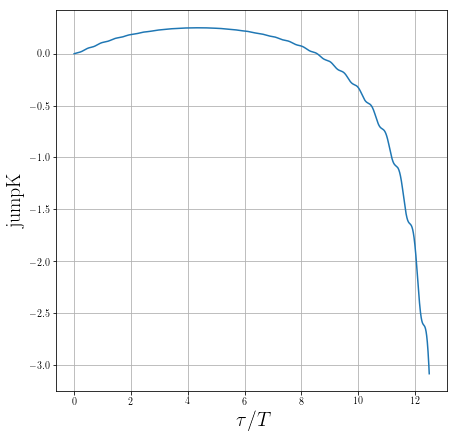

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_k)
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpK', fontsize=20)
plt.show()

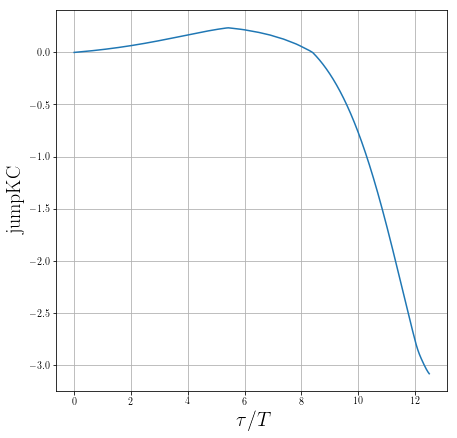

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_kC)
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKC', fontsize=20)
plt.show()

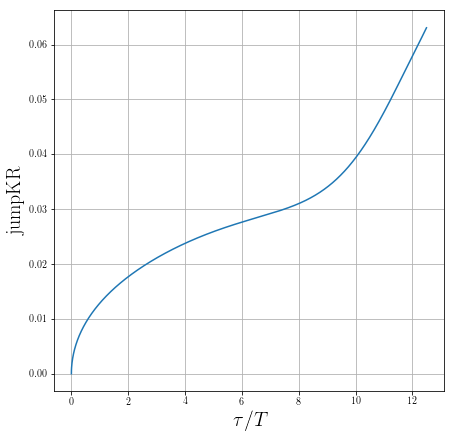

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p-st)), jump_kR[:N_grid-2*p-st])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKR', fontsize=20)
plt.show()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


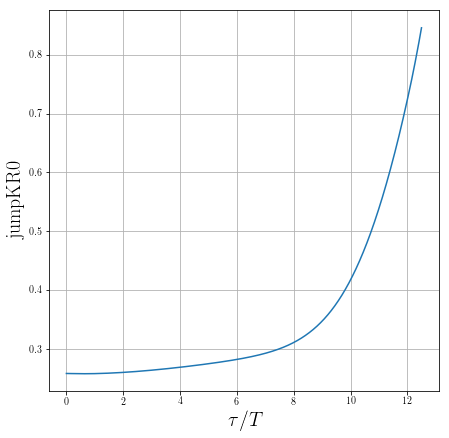

In [9]:
sk=[]
for s in range(N_grid-2*p):
    k0=np.array([d]*N_grid)
    k0[2*p:2*p+s]=d+dd
    sk.append(np.std(k0))

jump_kR0=np.divide(jump_kR, sk)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p-st)), jump_kR0[:N_grid-2*p-st])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()

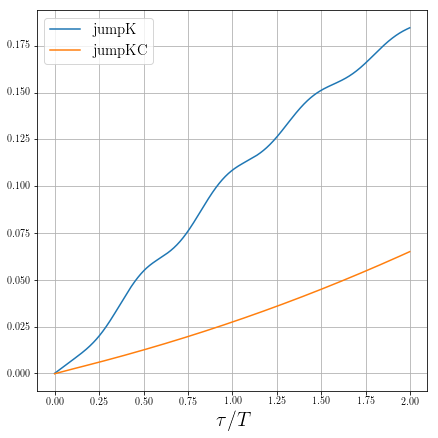

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(2*p)), jump_k[:2*p])
plt.plot(1/p*np.array(range(2*p)), jump_kC[:2*p])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.legend(['jumpK', 'jumpKC'], fontsize=15)
#plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()

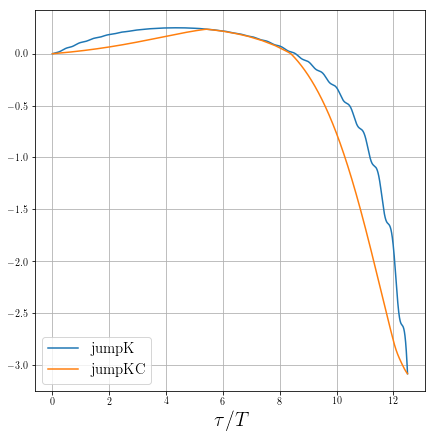

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_k[:])
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_kC[:])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.legend(['jumpK', 'jumpKC'], fontsize=15)
#plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()